<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250-4.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.966385,56.986796,85.186490,1.837701,248.977373,247.096879,1.880494
1,0.0,1.0,99.897043,77.668691,30.856507,-0.295781,218.126460,218.447584,-0.321124
2,0.0,2.0,21.954628,75.935984,74.988461,0.909091,183.788164,182.900249,0.887915
3,0.0,3.0,24.994905,35.173178,28.325536,0.002713,98.496331,98.293156,0.203175
4,0.0,4.0,91.627597,89.659701,73.012241,1.441875,265.741414,264.404817,1.336598
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,60.317622,51.295892,50.047591,0.192733,171.853839,171.604716,0.249123
249996,999.0,246.0,97.698629,22.358325,91.488769,-2.283048,219.262675,221.354685,-2.092010
249997,999.0,247.0,79.136914,33.858701,53.435491,0.587165,177.018272,176.294651,0.723621
249998,999.0,248.0,55.689853,83.355445,36.506066,0.290496,185.841860,185.674132,0.167728


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    94.966385  56.986796  85.186490  ...  248.977373  247.096879  1.880494
      1.0    99.897043  77.668691  30.856507  ...  218.126460  218.447584 -0.321124
      2.0    21.954628  75.935984  74.988461  ...  183.788164  182.900249  0.887915
      3.0    24.994905  35.173178  28.325536  ...   98.496331   98.293156  0.203175
      4.0    91.627597  89.659701  73.012241  ...  265.741414  264.404817  1.336598
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  60.317622  51.295892  50.047591  ...  171.853839  171.604716  0.249123
      246.0  97.698629  22.358325  91.488769  ...  219.262675  221.354685 -2.092010
      247.0  79.136914  33.858701  53.435491  ...  177.018272  176.294651  0.723621
      248.0  55.689853  83.355445  36.506066  ...  185.841860  185.674132  0.167728
      249.0  88.460900  41.290643  31.151805  ...  169.267664  170.823216 -1.555552

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    94.966385  56.986796  85.186490  ...  248.977373  247.096879  1.880494
      1.0    99.897043  77.668691  30.856507  ...  218.126460  218.447584 -0.321124
      2.0    21.954628  75.935984  74.988461  ...  183.788164  182.900249  0.887915
      3.0    24.994905  35.173178  28.325536  ...   98.496331   98.293156  0.203175
      4.0    91.627597  89.659701  73.012241  ...  265.741414  264.404817  1.336598
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  60.317622  51.295892  50.047591  ...  171.853839  171.604716  0.249123
      246.0  97.698629  22.358325  91.488769  ...  219.262675  221.354685 -2.092010
      247.0  79.136914  33.858701  53.435491  ...  177.018272  176.294651  0.723621
      248.0  55.689853  83.355445  36.506066  ...  185.841860  185.674132  0.167728
      249.0  88.460900  41.290643  31.151805  ...  169.267664  170.823216 -1.555552

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.966385,56.986796,85.186490,1.837701,248.977373,247.096879,1.880494
1,0.0,1.0,99.897043,77.668691,30.856507,-0.295781,218.126460,218.447584,-0.321124
2,0.0,2.0,21.954628,75.935984,74.988461,0.909091,183.788164,182.900249,0.887915
3,0.0,3.0,24.994905,35.173178,28.325536,0.002713,98.496331,98.293156,0.203175
4,0.0,4.0,91.627597,89.659701,73.012241,1.441875,265.741414,264.404817,1.336598
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,60.317622,51.295892,50.047591,0.192733,171.853839,171.604716,0.249123
249996,999.0,246.0,97.698629,22.358325,91.488769,-2.283048,219.262675,221.354685,-2.092010
249997,999.0,247.0,79.136914,33.858701,53.435491,0.587165,177.018272,176.294651,0.723621
249998,999.0,248.0,55.689853,83.355445,36.506066,0.290496,185.841860,185.674132,0.167728


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    94.966385  56.986796  85.186490  ...  248.977373  247.096879  1.880494
      1.0    99.897043  77.668691  30.856507  ...  218.126460  218.447584 -0.321124
      2.0    21.954628  75.935984  74.988461  ...  183.788164  182.900249  0.887915
      3.0    24.994905  35.173178  28.325536  ...   98.496331   98.293156  0.203175
      4.0    91.627597  89.659701  73.012241  ...  265.741414  264.404817  1.336598
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  60.317622  51.295892  50.047591  ...  171.853839  171.604716  0.249123
      246.0  97.698629  22.358325  91.488769  ...  219.262675  221.354685 -2.092010
      247.0  79.136914  33.858701  53.435491  ...  177.018272  176.294651  0.723621
      248.0  55.689853  83.355445  36.506066  ...  185.841860  185.674132  0.167728
      249.0  88.460900  41.290643  31.151805  ...  169.267664  170.823216 -1.555552

[250000 rows x 7 columns]

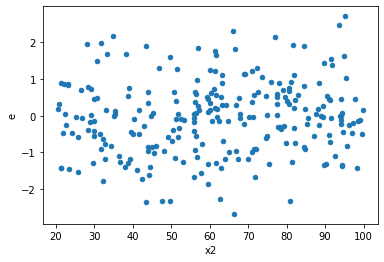

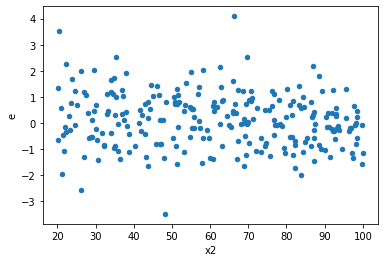

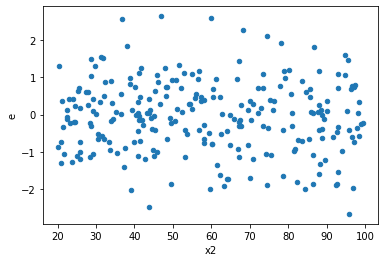

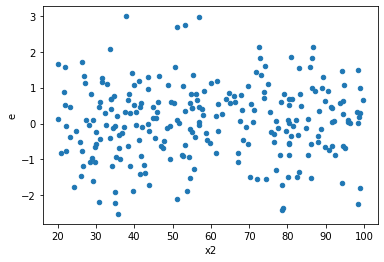

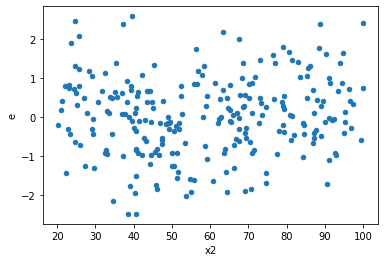

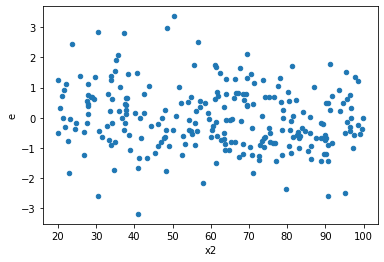

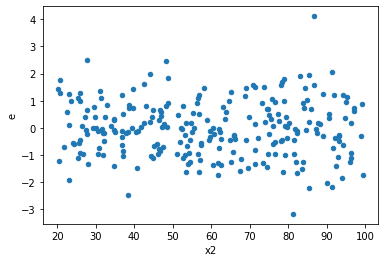

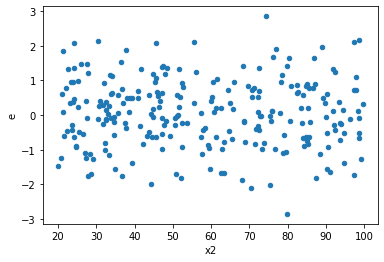

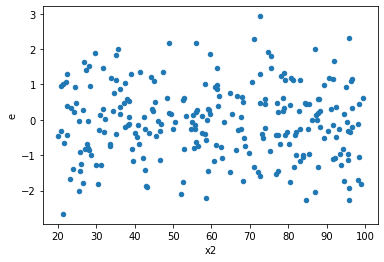

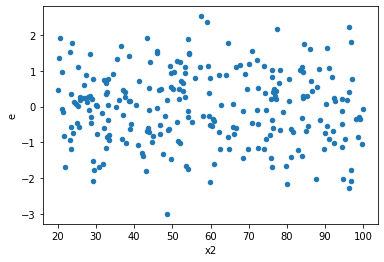

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,126.0,118.0,110.31278534600334,143.65441390318907,0.8754982963968518,1.2174102873151615,1.390534159033161,0.07079925888931649,0.9646003705553418,0.03539962944465824,Reject001=1 : Homoscedasticity
6.0,126.0,118.0,115.39967564064305,137.93739640409908,0.9158704415924052,1.1689609864754158,1.2763388066580326,0.18069798981903817,0.9096510050904809,0.09034899490951909,Reject001=1 : Homoscedasticity
11.0,119.0,125.0,96.85554960908209,105.46787148569149,0.8139121815889251,0.8437429718855319,1.0366511166332109,0.8416099319658614,0.5791950340170693,0.4208049659829307,Reject001=1 : Homoscedasticity
12.0,120.0,124.0,95.4155413189643,133.65590347959682,0.7951295109913692,1.0778701893515872,1.3555907238403166,0.09379582485544113,0.9531020875722794,0.04689791242772057,Reject001=1 : Homoscedasticity
14.0,134.0,110.0,110.20933221262939,120.90775406078218,0.8224577030793239,1.0991614005525654,1.3364351703890045,0.11539948763023844,0.9423002561848808,0.05769974381511922,Reject001=1 : Homoscedasticity
15.0,122.0,122.0,109.6903041351691,156.3622702336861,0.8991008535669598,1.281657952735132,1.4254885285120926,0.0513201135225585,0.9743399432387208,0.02566005676127925,Reject001=1 : Homoscedasticity
16.0,131.0,113.0,134.38682759803984,118.38654192889499,1.0258536457865637,1.0476685126450884,1.0212650868358502,0.9114946875004297,0.5442526562497851,0.45574734375021486,Reject001=1 : Homoscedasticity
18.0,127.0,117.0,103.27041598868658,123.66731430152544,0.8131528818006817,1.0569855923207303,1.2998608453309477,0.150694554701011,0.9246527226494945,0.0753472773505055,Reject001=1 : Homoscedasticity
19.0,120.0,124.0,120.79808254068412,150.91072178766936,1.0066506878390344,1.2170219499005595,1.2089813920587753,0.2953080828618573,0.8523459585690714,0.14765404143092864,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,121.0,123.0,120.93479077313503,120.21605745424881,0.9994610807697111,0.9773663207662505,0.9778933262849567,0.9023442358801713,Reject001=1 : Homoscedasticity
1.0,134.0,110.0,164.96946381283573,87.73194916386115,1.2311154015883263,0.7975631742169195,0.6478378657174961,0.016639466965754628,Reject001=1 : Homoscedasticity
2.0,116.0,128.0,125.59030906028923,97.97520694432885,1.0826750781059415,0.7654313042525691,0.7069815494336801,0.057999957742553836,Reject001=1 : Homoscedasticity
3.0,126.0,118.0,110.31278534600334,143.65441390318907,0.8754982963968518,1.2174102873151615,1.390534159033161,0.07079925888931649,Reject001=1 : Homoscedasticity
4.0,115.0,129.0,113.22035093004762,124.05064125618887,0.9845247906960662,0.9616328779549524,0.9767482617426738,0.8997756428680752,Reject001=1 : Homoscedasticity
5.0,129.0,115.0,162.36901066243723,94.80293653571621,1.2586745012592033,0.824373361180141,0.6549535724728048,0.019661073601893553,Reject001=1 : Homoscedasticity
6.0,126.0,118.0,115.39967564064305,137.93739640409908,0.9158704415924052,1.1689609864754158,1.2763388066580326,0.18069798981903817,Reject001=1 : Homoscedasticity
7.0,112.0,132.0,120.84496121420003,111.14051200995556,1.0789728679839288,0.8419735758329967,0.7803473106846815,0.17668474263788692,Reject001=1 : Homoscedasticity
8.0,116.0,128.0,130.23664983518682,129.9143961858275,1.122729739958507,1.0149562202017774,0.904007602256343,0.58096977665584,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      993
Reject001=0 : Heteroscedasticity      7
Name: Result_test, dtype: int64